## Grid Search for best hyperparameters of SVC model
esp. for c, and gamma

In [1]:
import os
import json
import math
import pandas as pd
import svc as svc_lib

datareader = svc_lib.DataReader(data_dir = '../data/',
                                train_valid_file = 'Data_train_validation_2019-1126.xlsx',                                
                                test_file = 'Data_test_2019-1126.xlsx',
                                feature_in = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17'],
                                output_col = 'Type',
                                k_fold = 5)

exponent_list = [-5, -3, -1, 0, 1, 3, 5, 7, 9, 11, 13, 15]
c_list = [math.pow(2, exp) for exp in exponent_list]
gamma_list = [math.pow(2, exp) for exp in exponent_list]

best_acc = 0
best_hyper_param = dict()
best_performance = dict()
summary = pd.DataFrame(columns=['c', 'gamma', 'acc_train_avg', 'acc_valid_avg', 'acc_test_avg'])
for c in c_list:
    for gamma in gamma_list:
            
        ## create svc object
        svc = svc_lib.SVC(c = c,
                          gamma = gamma)

        ## config of datareader and knn
        config = svc_lib.configuration_grid_search(datareader, svc)

        ## ensure that output dir exists in local
        output_dir = f'output/{datareader.k_fold}-fold_c-{c}_g-{gamma}'
        if not os.path.isdir(output_dir):
            os.makedirs(output_dir)    

        ## record the config 
        with open(output_dir+'/config.json', 'w') as fout:
            json.dump(config, fout, indent = 4)

        ## run svc with k-fold validation
        print (output_dir)
        acc_train_avg, acc_valid_avg, acc_test_avg = svc_lib.k_fold_validation(datareader, svc, output_dir)            

        ## find the best hyper param of svc model
        if acc_valid_avg > best_acc:
            best_hyper_param['c'] = c
            best_hyper_param['gamma'] = gamma
            best_performance['acc_train_avg'] = acc_train_avg
            best_performance['acc_valid_avg'] = acc_valid_avg
            best_performance['acc_test_avg'] = acc_test_avg
            best_acc = acc_valid_avg

        ## record all output in summary
        summary.loc[len(summary)] = [c, gamma, acc_train_avg, acc_valid_avg, acc_test_avg]

## check best performace with best hyperparam.
print ()
print ('best_hyper_param of svc model:')
print (best_hyper_param)
print ()
print ('best performance of svc model:')
print (f"average accuracy of train set in {datareader.k_fold}-fold: {best_performance['acc_train_avg']}")
print (f"average accuracy of valid set in {datareader.k_fold}-fold: {best_performance['acc_valid_avg']}")
print (f"average accuracy of test set in {datareader.k_fold}-fold: {best_performance['acc_test_avg']}")
print ()

## achieve summary file to dir
print ('overall summary for all models')
print (summary)
summary.to_excel(f'output/Summary_grid-search_{datareader.k_fold}-fold.xlsx')

output/5-fold_c-0.03125_g-0.03125
output/5-fold_c-0.03125_g-0.125
output/5-fold_c-0.03125_g-0.5
output/5-fold_c-0.03125_g-1.0
output/5-fold_c-0.03125_g-2.0
output/5-fold_c-0.03125_g-8.0
output/5-fold_c-0.03125_g-32.0
output/5-fold_c-0.03125_g-128.0
output/5-fold_c-0.03125_g-512.0
output/5-fold_c-0.03125_g-2048.0
output/5-fold_c-0.03125_g-8192.0
output/5-fold_c-0.03125_g-32768.0
output/5-fold_c-0.125_g-0.03125
output/5-fold_c-0.125_g-0.125
output/5-fold_c-0.125_g-0.5
output/5-fold_c-0.125_g-1.0
output/5-fold_c-0.125_g-2.0
output/5-fold_c-0.125_g-8.0
output/5-fold_c-0.125_g-32.0
output/5-fold_c-0.125_g-128.0
output/5-fold_c-0.125_g-512.0
output/5-fold_c-0.125_g-2048.0
output/5-fold_c-0.125_g-8192.0
output/5-fold_c-0.125_g-32768.0
output/5-fold_c-0.5_g-0.03125
output/5-fold_c-0.5_g-0.125
output/5-fold_c-0.5_g-0.5
output/5-fold_c-0.5_g-1.0
output/5-fold_c-0.5_g-2.0
output/5-fold_c-0.5_g-8.0
output/5-fold_c-0.5_g-32.0
output/5-fold_c-0.5_g-128.0
output/5-fold_c-0.5_g-512.0
output/5-fold_c-0

## Plot the summary results by contourf func. of matplotlib

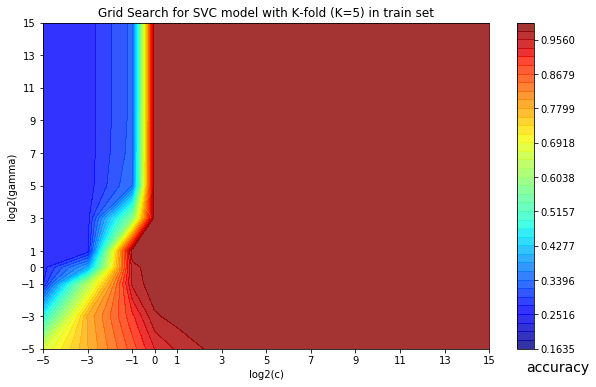

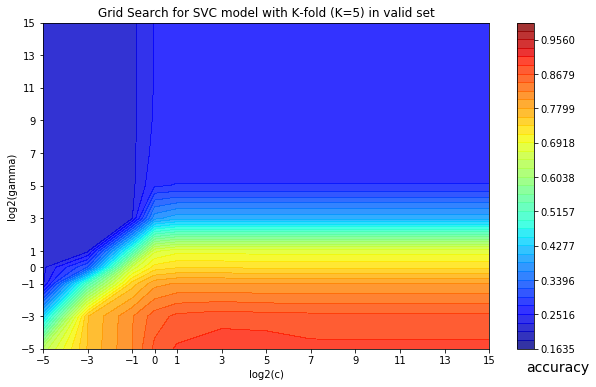

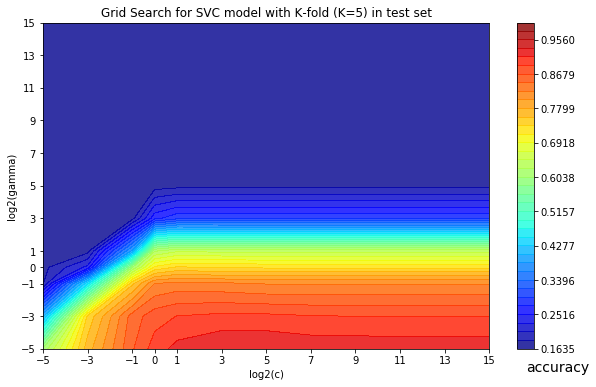

In [17]:
import numpy as np
import matplotlib.pyplot as plt

## custom shared colorbar 
vmin = np.min(summary.iloc[:, 2:].values)
vmax = np.max(summary.iloc[:, 2:].values)
levels = np.linspace(vmin, vmax, 39)

for dataset in ['train', 'valid', 'test']:
    
    acc = summary.loc[:, f'acc_{dataset}_avg'].values    
    acc = acc.reshape(len(c_list), len(gamma_list)).T    
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_title(f"Grid Search for SVC model with K-fold (K=5) in {dataset} set")
    C = ax.contourf(exponent_list, exponent_list, acc, levels=levels, alpha=0.8, cmap='jet')
    ax.set_xticks(exponent_list)
    ax.set_yticks(exponent_list)
    ax.set_xlabel("log2(c)")
    ax.set_ylabel("log2(gamma)")
    cb = fig.colorbar(C, ax=ax, orientation='vertical', pad=0.05)
    cb.set_label("accuracy", labelpad=-40, y=-0.08, rotation=0, fontsize=14)
    cb.ax.yaxis.set_label_position('left')
    
    plt.savefig(f'output/grid_search_in_{dataset}_set.png', dpi=300)